# Sistem Rekomendasi Parfum Berbasis Content-Based Filtering
- **Nama:** Ahmad Sabil Deva Pratama
- **Email:** devapratama4912@gmail.com
- **ID Dicoding:** devaprtm49

## **1. Project Overview**

### **1.1 Latar Belakang**
Dalam industri parfum, pemilihan parfum yang tepat seringkali menjadi tantangan bagi konsumen, khususnya mereka yang tidak berpengalaman. Banyaknya pilihan yang tersedia dan kurangnya informasi yang jelas mengenai produk menyebabkan konsumen kesulitan dalam membuat keputusan. Seiring dengan perkembangan teknologi, sistem rekomendasi telah digunakan di banyak industri untuk membantu pengguna menemukan produk yang sesuai dengan preferensi mereka. Proyek ini bertujuan untuk membangun sistem rekomendasi parfum menggunakan teknik **Content-Based Filtering**, yang mengandalkan informasi mengenai deskripsi produk dan catatan wewangian untuk memberikan rekomendasi yang personal.

### **1.2 Tujuan Proyek**
Tujuan utama dari proyek ini adalah:
1. Mengembangkan sistem rekomendasi parfum berbasis **Content-Based Filtering** untuk memberikan rekomendasi parfum yang relevan bagi pengguna.
2. Menganalisis kemiripan antar parfum berdasarkan deskripsi produk dan catatan wewangian yang dimiliki setiap parfum.
3. Mengevaluasi performa sistem dengan menggunakan metrik Precision at K untuk mengukur sejauh mana rekomendasi yang diberikan benar-benar relevan dengan pengguna.

### **1.3 Pentingnya Proyek**
Sistem rekomendasi parfum ini sangat berguna untuk membantu konsumen menemukan parfum yang sesuai dengan preferensi mereka tanpa harus melalui proses pencarian yang memakan waktu. Dengan memanfaatkan **Content-Based Filtering**, sistem ini dapat memberikan rekomendasi yang personal bahkan tanpa membutuhkan data historis tentang interaksi pengguna.

## **2. Business Understanding**

### **2.1 Problem Statements**

1. Bagaimana memberikan rekomendasi parfum yang relevan berdasarkan karakteristik parfum yang ada?
2. Bagaimana mengukur kesamaan antar parfum secara efektif untuk meningkatkan relevansi rekomendasi?

### **2.2 Goals**

1. Mengembangkan sistem rekomendasi parfum berbasis **Content-Based Filtering**.
2. Menganalisis kesamaan antar parfum berdasarkan deskripsi produk dan catatan wewangian.

### **2.3 Solution Statement**

Pendekatan yang digunakan untuk mencapai tujuan adalah:
1. Menggunakan **TF-IDF Vectorizer** untuk mengolah deskripsi parfum dan catatan wewangian menjadi representasi numerik.
2. Menghitung kesamaan antar parfum menggunakan **Cosine Similarity**.

Dengan solusi ini, diharapkan sistem rekomendasi parfum dapat membantu konsumen menemukan produk yang sesuai dengan preferensi mereka lebih efisien dan meningkatkan konversi penjualan untuk bisnis parfum.

## **3. Data Understanding**

### **3.1 Deskripsi Dataset**
Dataset yang digunakan dalam proyek ini berasal dari **Kaggle**, dengan judul *Perfume Recommendation Dataset* (https://www.kaggle.com/datasets/nandini1999/perfume-recommendation-dataset). Dataset ini berisi informasi mengenai 2.191 parfum dari berbagai merek. Dataset ini memiliki lima kolom utama:


| **Kolom**       | **Deskripsi**                                               |
|-----------------|-------------------------------------------------------------|
| **Name**        | Nama parfum                                                 |
| **Brand**       | Merek atau perusahaan pembuat parfum                        |
| **Description** | Deskripsi tentang parfum, termasuk suasana hati dan karakteristik aroma |
| **Notes**       | Daftar catatan wewangian yang ada dalam parfum (misalnya, citrus, musk, lavender) |
| **Image URL**   | URL gambar dari parfum                                      |

In [1]:
# Import Semua Packages/Library yang Digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('final_perfume_data.csv', encoding= 'unicode_escape')
data.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


Dari output tersebut, kita dapat melihat bahwa dataset ini berisi informasi yang relevan mengenai parfum, seperti nama, merek, deskripsi, catatan wewangian, dan URL gambar.

### **3.2 Data Quality**

Setelah membaca data, hal pertama yang perlu diperiksa adalah kualitas data, termasuk adanya nilai yang hilang (missing values). Ini sangat penting karena nilai yang hilang pada kolom **Description** atau **Notes** dapat mempengaruhi performa model rekomendasi.

In [3]:
missing_values = data.isnull().sum()
missing_values

,0
Name,0
Brand,0
Description,0
Notes,80
Image URL,0


Berdasarkan hasil tersebut, kita melihat bahwa kolom Notes memiliki 80 nilai yang hilang. Hal ini perlu diatasi dengan cara yang sesuai, misalnya dengan mengisi nilai yang hilang dengan string kosong ('') atau menggunakan teknik lain.

### **3.3 Exploratory Data Analysis (EDA)**

Untuk memahami data lebih dalam, kita akan melakukan beberapa analisis eksplorasi dengan menggunakan visualisasi. Beberapa poin yang perlu dianalisis adalah distribusi jumlah parfum berdasarkan merek, panjang deskripsi, dan jumlah catatan wewangian.

#### **3.3.1 Distribusi Merek Parfum**:

Kita akan membuat grafik distribusi jumlah parfum berdasarkan merek untuk memahami apakah ada merek yang lebih dominan.

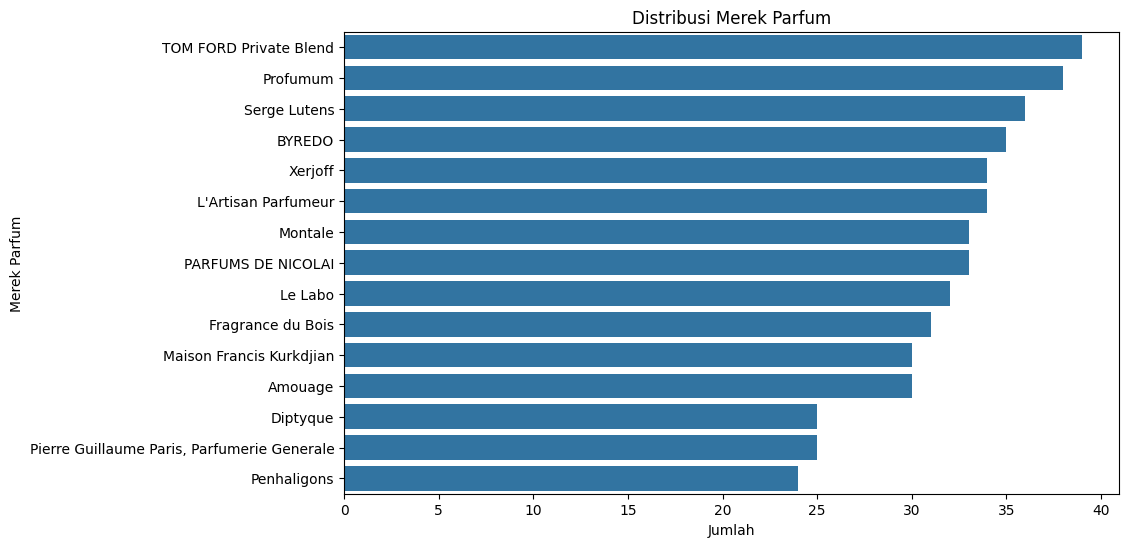

In [4]:
# Grafik distribusi jumlah parfum berdasarkan merek (Top 15)
plt.figure(figsize=(10, 6))
sns.countplot(y='Brand', data=data, order=data['Brand'].value_counts().head(15).index)
plt.title('Distribusi Merek Parfum')
plt.xlabel('Jumlah')
plt.ylabel('Merek Parfum')
plt.show()

Merek TOM FORD Private Blend paling sering ditemukan, diikuti oleh Profumum dan Serge Lutens, yang menunjukkan dominasi merek-merek premium di pasar ini. Merek lain yang lebih kecil dapat memanfaatkan celah dengan menawarkan produk yang unik atau lebih terjangkau.

#### **3.3.2 Distribusi Panjang Deskripsi Parfum**:

Panjang deskripsi parfum dapat memberikan informasi mengenai variasi untuk setiap parfum.

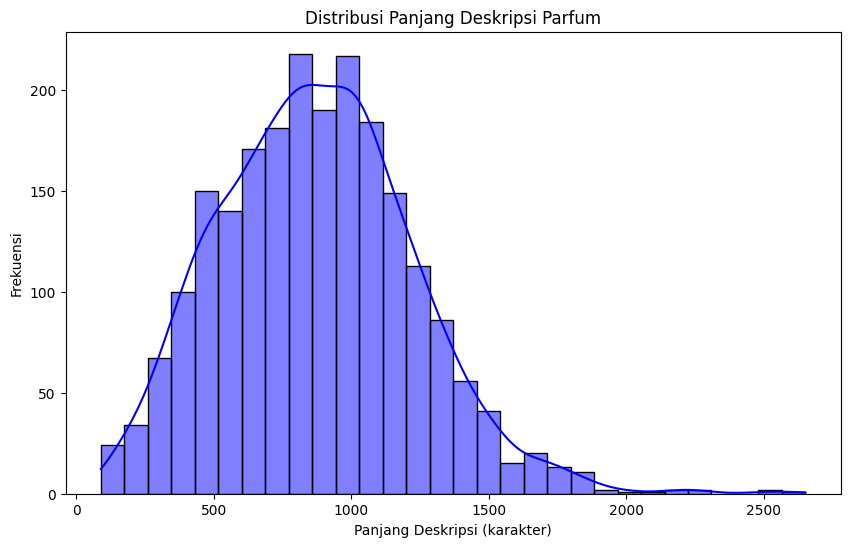

In [5]:
data['Description_Length'] = data['Description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data['Description_Length'], kde=True, color='blue', bins=30)
plt.title('Distribusi Panjang Deskripsi Parfum')
plt.xlabel('Panjang Deskripsi (karakter)')
plt.ylabel('Frekuensi')
plt.show()

Deskripsi parfum yang paling umum memiliki panjang antara 800–1200 karakter, cukup untuk memberikan informasi lengkap tanpa terlalu panjang. Fokus pada penulisan yang singkat tetapi menarik dapat membantu konsumen memahami produk dengan mudah.

#### **3.3.3 Distribusi Jumlah Catatan Wewangian**:

Kita akan melihat distribusi jumlah catatan wewangian pada setiap parfum.

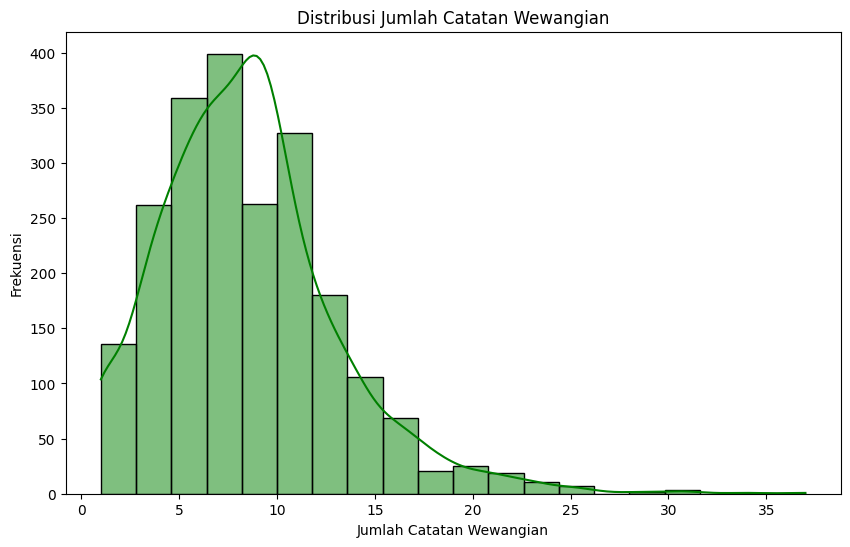

In [6]:
data['Notes_Count'] = data['Notes'].apply(lambda x: len(str(x).split(',')))
plt.figure(figsize=(10, 6))
sns.histplot(data['Notes_Count'], kde=True, color='green', bins=20)
plt.title('Distribusi Jumlah Catatan Wewangian')
plt.xlabel('Jumlah Catatan Wewangian')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar parfum memiliki 5–10 catatan wewangian, menunjukkan bahwa konsumen cenderung menyukai parfum dengan kompleksitas yang sedang. Untuk menarik perhatian konsumen, produsen dapat bereksperimen dengan jumlah catatan yang lebih banyak atau unik.

## **4. Data Preparation**

Pada tahap Data Preparation, kita mempersiapkan data yang telah diperoleh untuk digunakan dalam model rekomendasi berbasis konten. Proses ini melibatkan beberapa langkah penting seperti menangani nilai yang hilang, pengolahan data teks (feature extraction), dan persiapan data untuk pemodelan.

### **4.1 Menangani Nilai yang Hilang (Missing Values)**

Data yang hilang atau tidak lengkap dapat memengaruhi kualitas model rekomendasi yang akan dibangun. Oleh karena itu, salah satu langkah pertama dalam proses persiapan data adalah menangani nilai yang hilang pada kolom-kolom penting dalam dataset.

Pada dataset ini, kita akan memeriksa kolom Notes yang memiliki nilai kosong atau NaN, dan menggantinya dengan string kosong (`""`) untuk menghindari kesalahan saat melakukan pemodelan berbasis teks.

In [7]:
data['Description'] = data['Description'].fillna('')
data['Notes'] = data['Notes'].fillna('')

missing_values = data.isnull().sum()
print(missing_values)

Name                  0
Brand                 0
Description           0
Notes                 0
Image URL             0
Description_Length    0
Notes_Count           0
dtype: int64


**Penjelasan:**
- Kita menggunakan fungsi `fillna('')` untuk mengganti nilai yang hilang dengan string kosong pada kolom yang relevan.
- Dengan ini, kita memastikan bahwa data tidak memiliki nilai kosong yang dapat menyebabkan masalah saat proses selanjutnya.

### **4.2 Feature Engineering**

Pada tahap ini, kita akan melakukan pengolahan teks untuk deskripsi dan catatan wewangian. Pengolahan teks ini penting untuk mengubah teks menjadi representasi numerik yang bisa diproses oleh model.

1. **Stopwords Removal & Tokenization**:

   - Stopwords adalah kata-kata umum yang tidak mengandung informasi penting (misalnya, "the", "and", "is"). Kita akan menghapus kata-kata ini.
   - Tokenization adalah proses memecah teks menjadi kata atau token.

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**:

   Teknik **TF-IDF** digunakan untuk mengubah teks menjadi vektor numerik. Kita akan menerapkan TF-IDF pada kolom Description dan Notes.

In [8]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=500)
tfidf_description = tfidf_vectorizer.fit_transform(data['Description'].fillna(''))
tfidf_notes = tfidf_vectorizer.fit_transform(data['Notes'].fillna(''))

print("TF-IDF matrix for Description:", tfidf_description.shape)
print("TF-IDF matrix for Notes:", tfidf_notes.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF matrix for Description: (2191, 500)
TF-IDF matrix for Notes: (2191, 500)


**Penjelasan:**
- TfidfVectorizer diterapkan pada kolom Description dan Notes untuk mengonversi teks menjadi vektor fitur numerik.
- `stop_words='english'` menghapus kata-kata umum dalam bahasa Inggris yang tidak memberikan informasi penting.
- `max_features=500` membatasi jumlah kata yang dipertimbangkan dalam proses vektorisasi untuk menghindari overfitting dan meningkatkan efisiensi.

### **4.3 Penggabungan Fitur**

Untuk membuat representasi fitur yang lebih kaya, kita akan menggabungkan vektor hasil dari **TF-IDF** untuk Description dan Notes menjadi satu fitur gabungan yang akan digunakan untuk menghitung kesamaan antar parfum. hstack() digunakan untuk menggabungkan fitur dari kedua kolom menjadi satu matriks fitur.

In [9]:
combined_features = hstack([tfidf_description, tfidf_notes])

print("Shape of combined feature matrix:", combined_features.shape)

Shape of combined feature matrix: (2191, 1000)


In [10]:
data['Perfume_ID'] = data.index
prepared_data = pd.DataFrame(combined_features.toarray(), index=data['Perfume_ID'])
prepared_data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Perfume_ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.420657,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.22623,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383246,0.285174,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.158027,0.0,0.0,0.00000,0.0,0.0,0.156535,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


**Penjelasan:**
- Kolom `Perfume_ID` ditambahkan untuk mereferensikan setiap parfum, yang akan mempermudah dalam mencari parfum terkait selama rekomendasi.
- Fitur yang telah digabungkan dikelompokkan menjadi DataFrame agar lebih mudah diakses dan dimanipulasi.

### **4.4 Penghitungan Kesamaan Cosine (Cosine Similarity)**

Karena kita sedang membangun sistem rekomendasi berbasis konten, kita akan mengukur kesamaan antara parfum berdasarkan deskripsi dan catatan wewangian mereka. Salah satu cara yang paling umum untuk mengukur kesamaan antar vektor fitur adalah dengan menggunakan Cosine Similarity. Cosine Similarity mengukur seberapa mirip dua vektor dengan menghitung sudut di antara keduanya. Nilai 1 berarti kedua vektor tersebut identik, dan nilai 0 berarti keduanya tidak memiliki kesamaan.

In [11]:
cosine_sim = cosine_similarity(combined_features)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Name'], columns=data['Name'])
cosine_sim_df.head()

Name,Tihota Eau de Parfum,Sola Parfum,Kagiroi Parfum,Velvet Fantasy Eau de Parfum,A Blvd. Called Sunset Eau de Parfum,Freckled and Beautiful Eau de Parfum,Exit the King Eau de Parfum,Eshu Extrait,Saringkarn Extrait,Arsalan Parfum,...,Dzing! Eau de Toilette,Perfect Nectar Eau de Parfum,Coquette tropique,Kai - Perfume Oil Roll-on Perfume Oil,To twirl all girly Perfume Oil Roll-on Perfume Oil,Perfect Veil Eau de Parfum,Scent Eau de Parfum,Bronze Eau de Parfum,Monyette Paris Fragrance Oil,1270 Eau de Parfum
Name,,,,,,,,,,,,,,,,,,,,,
Tihota Eau de Parfum,1.000000,0.024169,0.014922,0.111819,0.111957,0.127613,0.030570,0.013209,0.033740,0.012014,...,0.015787,0.005229,0.085615,0.020476,0.040044,0.080872,0.016102,0.102079,0.112348,0.030492
Sola Parfum,0.024169,1.000000,0.209632,0.030283,0.091221,0.027745,0.021210,0.029095,0.034598,0.020939,...,0.000000,0.041987,0.040546,0.000000,0.023208,0.000000,0.061323,0.045601,0.007768,0.036422
Kagiroi Parfum,0.014922,0.209632,1.000000,0.027495,0.017875,0.023785,0.012469,0.053437,0.091332,0.054614,...,0.010606,0.241638,0.055208,0.009740,0.019582,0.012723,0.056614,0.061414,0.016462,0.020610
Velvet Fantasy Eau de Parfum,0.111819,0.030283,0.027495,1.000000,0.217213,0.127350,0.179485,0.124008,0.111796,0.096707,...,0.041038,0.121075,0.062400,0.042875,0.037401,0.105744,0.080744,0.101150,0.077438,0.162733
A Blvd. Called Sunset Eau de Parfum,0.111957,0.091221,0.017875,0.217213,1.000000,0.179571,0.129379,0.015254,0.099436,0.089880,...,0.076138,0.037959,0.048209,0.036727,0.047841,0.194213,0.083349,0.114693,0.067729,0.071616


**Penjelasan:**
- Cosine Similarity dihitung antar parfum berdasarkan fitur gabungan dari kolom Description dan Notes.
- Hasilnya disusun dalam DataFrame yang memungkinkan kita untuk dengan mudah mengidentifikasi parfum yang serupa satu sama lain berdasarkan kesamaan fitur.

## **5. Modeling and Result**

Pada bagian ini, kita akan membangun model rekomendasi dengan content based filtering menggunakan matriks kesamaan (cosine similarity) yang telah dihitung sebelumnya. Model ini akan merekomendasikan parfum berdasarkan deskripsi dan catatan wewangian yang serupa. Proses ini mencakup penerapan cosine similarity untuk menghitung kesamaan antara parfum dan menampilkan hasil rekomendasi untuk pengguna.

### **5.1 Pembangunan Model Rekomendasi**

Model rekomendasi dengan content based filtering ini didasarkan pada **Cosine Similarity**, yang mengukur kesamaan antara parfum berdasarkan deskripsi dan catatan wewangian mereka. Untuk membuat rekomendasi, kita akan memilih parfum yang memiliki kesamaan tertinggi dengan parfum yang dipilih pengguna. Berikut adalah langkah-langkah yang dilakukan:

1. **Memilih Parfum sebagai Input**: Pengguna memilih parfum yang ingin mereka cari rekomendasinya.
2. **Menghitung Kesamaan**: Untuk parfum yang dipilih, kita akan mencari parfum lain yang memiliki kesamaan tertinggi berdasarkan matriks cosine similarity.
3. **Menampilkan Top-N Rekomendasi**: Menampilkan 5 parfum teratas yang paling mirip dengan parfum yang dipilih.

In [12]:
def get_recommendations(perfume_name, cosine_sim_df, top_n=5):
    perfume_idx = cosine_sim_df.index.get_loc(perfume_name)
    sim_scores = list(enumerate(cosine_sim_df.iloc[perfume_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    recommended_perfumes = [(cosine_sim_df.index[i], score) for i, score in sim_scores]
    return recommended_perfumes

In [13]:
perfume_name = '  '
recommendations = get_recommendations(perfume_name, cosine_sim_df, top_n=5)
recommendations

[('Muskara Phero J Eau de Parfum', 0.3775375399005194),
 ('Vanille Noire du Mexique Eau de Toilette', 0.34181849964519195),
 ('Vanille Tonka Eau de Parfum', 0.3369550836293488),
 ('Vanille Absolu Eau de Parfum', 0.33018550252518825),
 ('Insulo Parfum Extrait', 0.3048400074982982)]

**Penjelasan:**
- Fungsi **get_recommendations()** digunakan untuk menerima nama parfum yang dipilih oleh pengguna dan memberikan daftar **Top-N parfum** yang paling mirip berdasarkan cosine similarity.
- Kita mengambil indeks dari parfum yang dipilih, menghitung kesamaan dengan parfum lainnya, mengurutkan hasilnya, dan menampilkan 5 rekomendasi parfum yang paling mirip.

### **5.2 Hasil Rekomendasi**

Untuk memberikan gambaran yang lebih jelas, berikut adalah contoh hasil rekomendasi untuk parfum yang dipilih, yaitu **"Tihota Eau de Parfum"**.

In [14]:
for idx, (name, score) in enumerate(recommendations):
    print(f"Recommendation {idx+1}: {name} with similarity score: {score:.4f}")

Recommendation 1: Muskara Phero J Eau de Parfum with similarity score: 0.3775
Recommendation 2: Vanille Noire du Mexique Eau de Toilette with similarity score: 0.3418
Recommendation 3: Vanille Tonka Eau de Parfum with similarity score: 0.3370
Recommendation 4: Vanille Absolu Eau de Parfum with similarity score: 0.3302
Recommendation 5: Insulo Parfum Extrait with similarity score: 0.3048


**Penjelasan:**
- Hasil di atas menunjukkan 5 parfum teratas yang paling mirip dengan **Tihota Eau de Parfum**, yang telah dihitung berdasarkan **Cosine Similarity**.
- Setiap parfum memiliki skor kesamaan yang menunjukkan seberapa mirip parfum tersebut dengan yang dipilih. Skor mendekati 1 menunjukkan kesamaan yang sangat tinggi, sementara skor yang lebih rendah menunjukkan kesamaan yang lebih rendah.

Model rekomendasi dengan content based filtering ini memberikan hasil yang dapat digunakan untuk meningkatkan pengalaman pengguna dengan memberikan saran parfum yang serupa dengan preferensi mereka. Hasil rekomendasi yang diberikan sangat tergantung pada fitur yang digunakan, yaitu deskripsi dan catatan wewangian parfum.


### **5.3 Kelebihan dan Kekurangan Model**

- **Kelebihan**:
  - Model rekomendasi dengan content based filtering ini dapat memberikan rekomendasi yang sangat relevan berdasarkan deskripsi dan catatan wewangian parfum.
  - Sistem ini tidak memerlukan data pengguna atau interaksi sebelumnya, sehingga dapat bekerja untuk pengguna baru (cold-start problem).

- **Kekurangan**:
  - Model rekomendasi dengan content based filtering hanya mengandalkan informasi dari deskripsi dan catatan wewangian, tanpa mempertimbangkan preferensi atau perilaku pengguna sebelumnya.
  - Rekomendasi yang dihasilkan mungkin tidak cukup beragam atau inovatif jika deskripsi dan catatan wewangian parfum sangat mirip satu sama lain.

## **6. Evaluation**

Evaluasi adalah tahap penting dalam membangun sistem rekomendasi, untuk mengukur sejauh mana sistem yang dibangun dapat memberikan rekomendasi yang relevan dan akurat. Dalam proyek ini, kita mengimplementasikan Content-Based Filtering untuk merekomendasikan parfum berdasarkan kemiripan deskripsi dan catatan wewangian. Untuk mengevaluasi kinerja sistem rekomendasi ini, kita akan menggunakan metrik Precision at K.


Precision at K adalah metrik yang mengukur persentase item relevan di dalam K rekomendasi teratas yang diberikan oleh sistem. Precision at K sangat penting dalam sistem rekomendasi berbasis konten karena kita ingin tahu seberapa banyak rekomendasi yang diberikan sesuai dengan preferensi pengguna, dalam hal ini, relevansi parfum yang disarankan.


**Formula Precision at K:**
$$
\text{Precision@K} = \frac{\text{Jumlah rekomendasi relevan di Top K}}{K}
$$


Rekomendasi dikategorikan relevan jika kesamaan antara parfum yang disarankan dan parfum yang diuji lebih tinggi dari ambang batas tertentu (misalnya, 0.3).


Untuk mengukur **Precision at K**, kita akan mengambil 200 parfum secara acak sebagai contoh dan menghitung seberapa relevan 5 rekomendasi teratas yang diberikan sistem. Kita anggap bahwa parfum yang memiliki skor kesamaan yang lebih tinggi dengan parfum yang diuji, dalam hal ini adalah 0.3 adalah relevan.


In [15]:
def calculate_precision_at_k(perfume_name, cosine_sim_df, k=5, threshold=0.3):
    recommendations = get_recommendations(perfume_name, cosine_sim_df, top_n=k)
    relevant_recommendations = sum([1 for _, score in recommendations if isinstance(score, (int, float)) and float(score) > threshold])
    precision_at_k = relevant_recommendations / k
    return precision_at_k

test_perfumes = data['Name'].sample(n=200, random_state=0).tolist()  # Ambil 200 parfum secara acak

**Penjelasan:**
- Fungsi `calculate_precision_at_k()` digunakan untuk menghitung Precision at K berdasarkan nilai k 5, 10 dan 20 dari k rekomendasi teratas yang diberikan oleh sistem untuk setiap parfum. Dalam hal ini, jumlah data yang dihitung Precision at K adalah 200 data yang diambil secara acak dari dataset.
- Rekomendasi dianggap relevan jika skor kesamaannya lebih tinggi dari threshold 0.3, yang dapat disesuaikan berdasarkan preferensi sistem.

### 6.1 Evaluasi Hasil Untuk K=5:

<ipython-input-16-0b205cf57c2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(set(precision_values)),


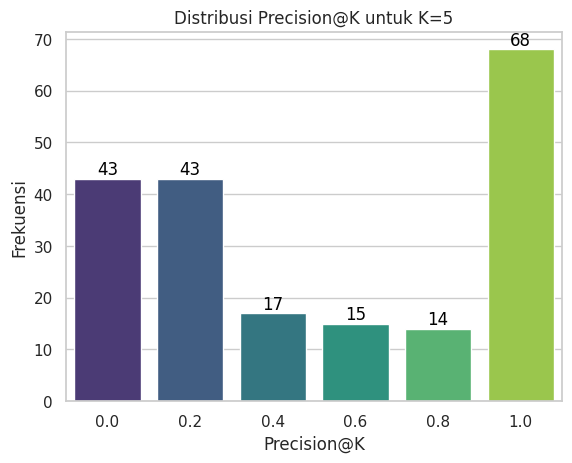

In [16]:
precisions = {perfume: calculate_precision_at_k(perfume, cosine_sim_df, k=5) for perfume in test_perfumes}
precision_values = list(precisions.values())
sns.set(style="whitegrid")

ax = sns.barplot(x=list(set(precision_values)),
                 y=[precision_values.count(x) for x in set(precision_values)],
                 palette="viridis")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Precision@K')
plt.ylabel('Frekuensi')
plt.title('Distribusi Precision@K untuk K=5')
plt.show()

- Precision@K = 1.00 (68 kali): Sekitar 34% dari parfum yang diuji mendapatkan 5 rekomendasi yang sepenuhnya relevan, menunjukkan bahwa sistem rekomendasi bekerja dengan baik untuk sebagian besar kasus dengan 5 rekomendasi.
- Precision@K = 0.00 (43 kali): Sekitar 21% dari sampel tidak mendapatkan rekomendasi yang relevan sama sekali, menunjukkan bahwa ada cukup banyak kasus di mana sistem rekomendasi gagal memberikan hasil yang sesuai.
- Precision@K = 0.20 (43 kali): Sekitar 21% dari sampel hanya mendapatkan 1 rekomendasi relevan dari 5, yang menunjukkan bahwa sebagian besar rekomendasi masih tidak relevan, meskipun ada beberapa yang sesuai.

### 6.2 Evaluasi Hasil Untuk K=10:

<ipython-input-18-fecb76eba9b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(set(precision_values)),


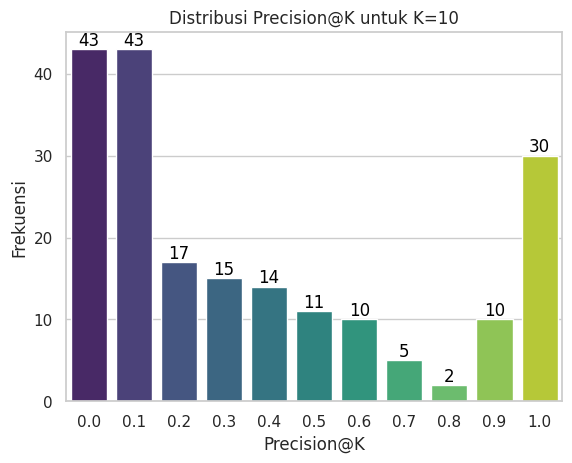

In [18]:
precisions = {perfume: calculate_precision_at_k(perfume, cosine_sim_df, k=10) for perfume in test_perfumes}
precision_values = list(precisions.values())
sns.set(style="whitegrid")

ax = sns.barplot(x=list(set(precision_values)),
                 y=[precision_values.count(x) for x in set(precision_values)],
                 palette="viridis")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Precision@K')
plt.ylabel('Frekuensi')
plt.title('Distribusi Precision@K untuk K=10')
plt.show()

- Precision@K = 0.00 (43 kali): Sekitar 21% sampel masih tidak mendapatkan rekomendasi relevan meskipun jumlah rekomendasi yang diberikan meningkat menjadi 10. Ini menunjukkan bahwa menambah jumlah rekomendasi tidak selalu memperbaiki hasil.
- Precision@K = 0.10 (43 kali): Sekitar 21% sampel hanya memiliki 1 rekomendasi relevan dari 10, yang berarti meskipun lebih banyak rekomendasi diberikan, kualitasnya tidak banyak meningkat.
- Precision@K = 1.00 (30 kali): Sekitar 15% sampel mendapatkan 10 rekomendasi yang sepenuhnya relevan, meskipun lebih sedikit dibandingkan dengan K=5.

### 6.3 Evaluasi Hasil Untuk K=20:

<ipython-input-20-d263e74bce2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(set(precision_values)),


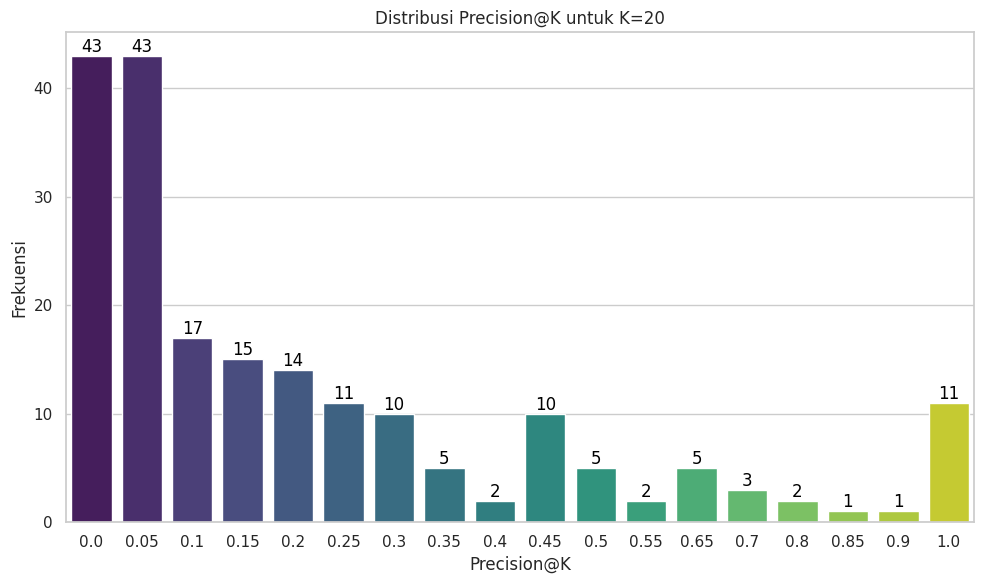

In [20]:
precisions = {perfume: calculate_precision_at_k(perfume, cosine_sim_df, k=20) for perfume in test_perfumes}
precision_values = list(precisions.values())
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=list(set(precision_values)),
                 y=[precision_values.count(x) for x in set(precision_values)],
                 palette="viridis")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Precision@K')
plt.ylabel('Frekuensi')
plt.title('Distribusi Precision@K untuk K=20')
plt.tight_layout()
plt.show()

- Precision@K = 0.00 (43 kali): Sekitar 21% sampel masih tidak mendapatkan rekomendasi yang relevan meskipun jumlah rekomendasi bertambah hingga 20, yang menunjukkan bahwa menambah jumlah rekomendasi tidak meningkatkan kualitas secara signifikan.
- Precision@K = 0.05 hingga 0.45 (5-43 kali): Banyak sampel hanya memiliki sedikit rekomendasi yang relevan, sekitar 1-3 dari 20 rekomendasi. Artinya, meskipun lebih banyak rekomendasi diberikan, mayoritas rekomendasi tidak relevan.
- Precision@K = 1.00 (11 kali): Hanya sekitar 5% dari sampel yang mendapatkan 20 rekomendasi yang sepenuhnya relevan, yang lebih sedikit dibandingkan dengan K=5 dan K=10.

### 6.4 Kesimpulan Hasil Evaluasi dan Rekomendasi

- K=5 memberikan hasil terbaik dengan sekitar 34% sampel mendapatkan 5 rekomendasi yang sepenuhnya relevan. Namun, masih ada sekitar 21% sampel yang mendapatkan hasil yang sangat buruk (relevansi 0%).
- K=10 tidak banyak memperbaiki hasil, meskipun lebih banyak rekomendasi diberikan, banyak sampel yang hanya memiliki sedikit rekomendasi relevan (1-2 dari 10).
- K=20 justru menurunkan kualitas rekomendasi, dengan lebih banyak sampel yang mendapatkan sedikit rekomendasi relevan meskipun ada 20 rekomendasi yang diberikan.
  
Rekomendasi: Untuk sistem rekomendasi ini, menggunakan K=5 lebih efektif karena memberikan rekomendasi yang lebih relevan secara konsisten dibandingkan dengan menambah jumlah rekomendasi.